<a href="https://colab.research.google.com/github/showmik121/Genetivie_AI/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building ANN using pytorch


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset,Dataset
import matplotlib.pyplot as plt

In [2]:
# set random seeds for reproducibility
torch.manual_seed(42)

In [5]:
df=pd.read_csv('fmnist_small.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


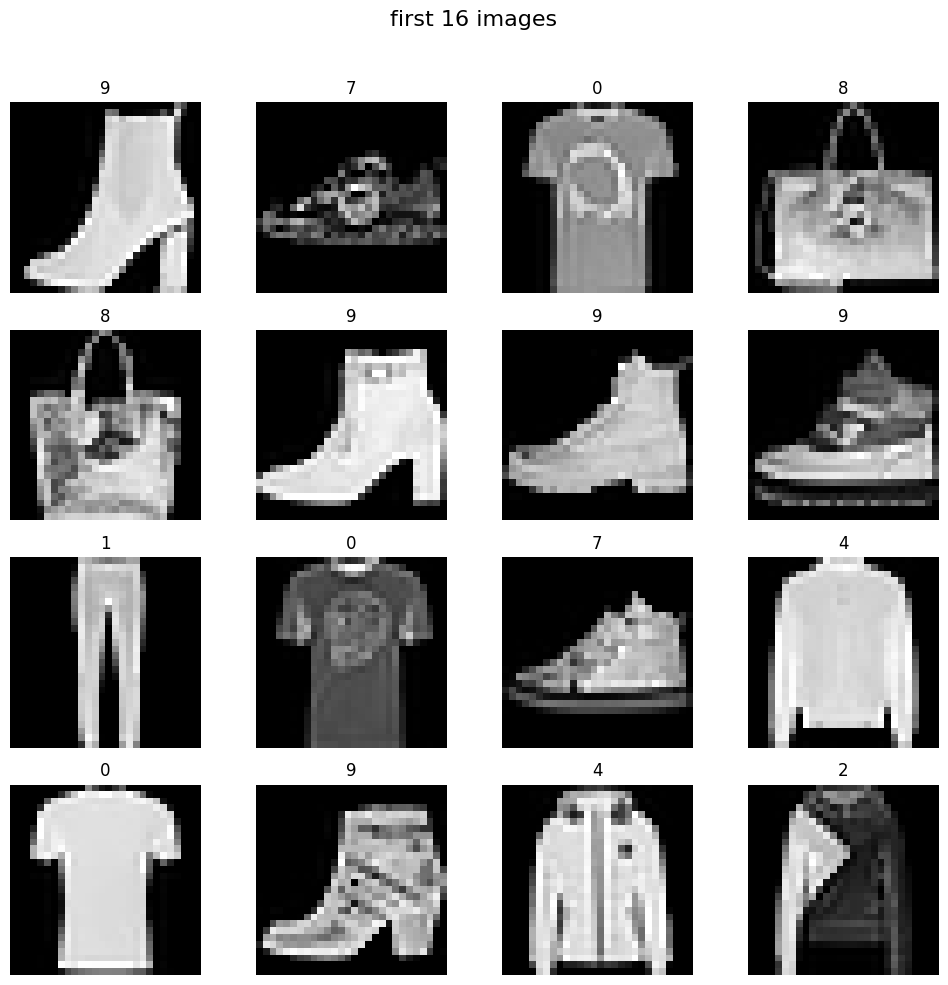

In [6]:
# create a 4x4 graid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("first 16 images", fontsize=16)
axes = axes.flatten()
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)
    ax.imshow(img, cmap='gray')
    ax.axis('off')
    ax.set_title(df.iloc[i, 0])
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

In [7]:
# train text spilt
x=df.iloc[:,1:].values
y=df.iloc[:,0].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
# scaling the feautures
x_train=x_train/255.0
x_test=x_test/255.0


In [9]:
x_train

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.0627451, 0.       ,
        0.       ]])

In [28]:
# create customDataset class
class CustomDataset(Dataset):
    def __init__(self,feautures,labels):
        self.feautures=torch.tensor(feautures,dtype=torch.float32)
        self.labels=torch.tensor(labels,dtype=torch.long)

    def __len__(self):
        return len(self.feautures)

    def __getitem__(self,idx):
       return self.feautures[idx],self.labels[idx]



In [29]:
# create train_dataset object
train_dataset=CustomDataset(x_train,y_train)


In [30]:
# create test_dataset object
test_dataset=CustomDataset(x_test,y_test)

In [13]:
# creat train and test loder
train_loader=DataLoader(train_dataset,batch_size=32,shuffle=True,num_workers=1)
test_loader=DataLoader(test_dataset,batch_size=32,shuffle=False,num_workers=1)

In [47]:
# define NN class
class MyNN(nn.Module):
    def __init__(self,num_features):
        super().__init__()
        self.model=nn.Sequential(
            nn.Linear(num_features,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,10),
            nn.Softmax(dim=1)
        )

    def forward(self,x):
        return self.model(x)

In [48]:
# instatiate model
num_features=x_train.shape[1]
model=MyNN(num_features)

In [56]:
# loss function and optimizer
import torch.optim as optim
# Use CrossEntropyLoss for multi-class classification
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [57]:
# training loop
num_epochs = 100

for epoch in range(num_epochs):
    total_loss = 0
    for features, labels in train_loader:
        # forward pass
        optimizer.zero_grad()  # Gradient Clear
        outputs = model(features)
        # loss calculate
        loss = criterion(outputs, labels)  # Output Shape ঠিক করা
        # back pass
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    # Print the loss for each epoch outside the inner loop
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(train_loader):.4f}')

Epoch [1/100], Loss: 2.3572
Epoch [2/100], Loss: 2.3572
Epoch [3/100], Loss: 2.3572
Epoch [4/100], Loss: 2.3572
Epoch [5/100], Loss: 2.3572
Epoch [6/100], Loss: 2.3572
Epoch [7/100], Loss: 2.3572
Epoch [8/100], Loss: 2.3572
Epoch [9/100], Loss: 2.3572
Epoch [10/100], Loss: 2.3572
Epoch [11/100], Loss: 2.3572
Epoch [12/100], Loss: 2.3572
Epoch [13/100], Loss: 2.3572
Epoch [14/100], Loss: 2.3572
Epoch [15/100], Loss: 2.3572
Epoch [16/100], Loss: 2.3572
Epoch [17/100], Loss: 2.3572
Epoch [18/100], Loss: 2.3572
Epoch [19/100], Loss: 2.3572
Epoch [20/100], Loss: 2.3572
Epoch [21/100], Loss: 2.3572
Epoch [22/100], Loss: 2.3572
Epoch [23/100], Loss: 2.3572
Epoch [24/100], Loss: 2.3572
Epoch [25/100], Loss: 2.3572
Epoch [26/100], Loss: 2.3572
Epoch [27/100], Loss: 2.3572
Epoch [28/100], Loss: 2.3572
Epoch [29/100], Loss: 2.3572
Epoch [30/100], Loss: 2.3572
Epoch [31/100], Loss: 2.3572
Epoch [32/100], Loss: 2.3572
Epoch [33/100], Loss: 2.3572
Epoch [34/100], Loss: 2.3572
Epoch [35/100], Loss: 2

In [58]:
# set model to eval mode
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
    (5): Softmax(dim=1)
  )
)

In [ ]:
# evaluation
def test_model(model, test_loader):
  model.eval()
  correct=0
  total=0
  with torch.no_grad():
    for features,labels in test_loader:
      outputs=model(features)
      _, predicted = torch.max(outputs,dim=1)  # Get predicted class indices
      total+=labels.size(0)
      correct+=(predicted==labels).sum().item()
  accuracy=100*correct/total
  return accuracy

test_acc = test_model(model, test_loader)
print(f"Test Accuracy: {test_acc:.2f}%")